In [ ]:
#import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# results table
results = pd.read_csv('/content/results.csv')
results

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,positionOrder,points,laps,milliseconds,fastestLapTime,statusId
0,1,18,1,1,1,1,1,10.0,58,5690616,01:27.5,1
1,2,18,2,2,5,2,2,8.0,58,5696094,01:27.7,1
2,3,18,3,3,7,3,3,6.0,58,5698779,01:28.1,1
3,4,18,4,4,11,4,4,5.0,58,5707797,01:28.6,1
4,5,18,5,1,3,5,5,4.0,58,5708630,01:27.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,16,0.0,44,5053521,01:51.0,1
26076,26082,1110,858,3,18,17,17,0.0,44,5054926,01:50.5,1
26077,26083,1110,807,210,0,18,18,0.0,44,5060900,01:49.9,1
26078,26084,1110,832,6,4,\N,19,0.0,23,\N,01:53.1,130


In [ ]:
# droppig statusId, and laps
results = results.drop(['statusId', 'laps'], axis=1)
results

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,positionOrder,points,milliseconds,fastestLapTime
0,1,18,1,1,1,1,1,10.0,5690616,01:27.5
1,2,18,2,2,5,2,2,8.0,5696094,01:27.7
2,3,18,3,3,7,3,3,6.0,5698779,01:28.1
3,4,18,4,4,11,4,4,5.0,5707797,01:28.6
4,5,18,5,1,3,5,5,4.0,5708630,01:27.4
...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,16,0.0,5053521,01:51.0
26076,26082,1110,858,3,18,17,17,0.0,5054926,01:50.5
26077,26083,1110,807,210,0,18,18,0.0,5060900,01:49.9
26078,26084,1110,832,6,4,\N,19,0.0,\N,01:53.1


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                26080 non-null  int64  
 1   raceId                  26080 non-null  int64  
 2   driverId                26080 non-null  int64  
 3   constructorId           26080 non-null  int64  
 4   resultStartingPosition  26080 non-null  int64  
 5   position                26080 non-null  object 
 6   positionOrder           26080 non-null  int64  
 7   points                  26080 non-null  float64
 8   milliseconds            26080 non-null  object 
 9   fastestLapTime          26080 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 2.0+ MB


In [ ]:
# calculate the mean of non-zeros
non_zero_mean = round(results[results['points'] != 0]['points'].mean(), 2)


In [ ]:
# replace the zeros with the mean
results['points'] = results['points'].replace(0, non_zero_mean)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,positionOrder,points,milliseconds,fastestLapTime
0,1,18,1,1,1,1,1,10.00,5690616,01:27.5
1,2,18,2,2,5,2,2,8.00,5696094,01:27.7
2,3,18,3,3,7,3,3,6.00,5698779,01:28.1
3,4,18,4,4,11,4,4,5.00,5707797,01:28.6
4,5,18,5,1,3,5,5,4.00,5708630,01:27.4
5,6,18,6,3,13,6,6,3.00,\N,01:29.6
6,7,18,7,5,17,7,7,2.00,\N,01:29.5
7,8,18,8,6,15,8,8,1.00,\N,01:27.9
8,9,18,9,2,2,\N,9,6.35,\N,01:28.8
9,10,18,10,7,18,\N,10,6.35,\N,01:29.6


In [ ]:
# dropping positionOrder

results = results.drop(['positionOrder'], axis=1)

In [ ]:
# In millisconds column replace \n with nan
# Replace '\\N' with NaN
results['milliseconds'] = results['milliseconds'].replace('\\N', np.nan)

In [ ]:
# turn millisconds into a float
results['milliseconds'] = results['milliseconds'].astype(float)

In [ ]:
# calculate the mean of non-NaN values
mean_milliseconds = round(results['milliseconds'].mean(), 2)


In [ ]:
# replace NaN values with the mean
results['milliseconds'] = results['milliseconds'].fillna(mean_milliseconds)

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,points,milliseconds,fastestLapTime
0,1,18,1,1,1,1,10.00,5690616.00,01:27.5
1,2,18,2,2,5,2,8.00,5696094.00,01:27.7
2,3,18,3,3,7,3,6.00,5698779.00,01:28.1
3,4,18,4,4,11,4,5.00,5707797.00,01:28.6
4,5,18,5,1,3,5,4.00,5708630.00,01:27.4
5,6,18,6,3,13,6,3.00,6219500.02,01:29.6
6,7,18,7,5,17,7,2.00,6219500.02,01:29.5
7,8,18,8,6,15,8,1.00,6219500.02,01:27.9
8,9,18,9,2,2,\N,6.35,6219500.02,01:28.8
9,10,18,10,7,18,\N,6.35,6219500.02,01:29.6


In [ ]:
# fastestlapTime replacing \n with NaN
results['fastestLapTime'] = results['fastestLapTime'].replace('\\N', np.nan)


In [ ]:

# Function to convert MM:SS.S format to seconds
def convert_to_seconds(time_str):
    if pd.isna(time_str):
        return np.nan
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

In [ ]:
# apply the  converstion function
results['fastestLapTime'] = results['fastestLapTime'].apply(convert_to_seconds)


In [ ]:
#calculate the mean of the non-NaN values
mean_time = results['fastestLapTime'].mean()

In [ ]:
# replace NaN values with the mean
results['fastestLapTime'] = results['fastestLapTime'].fillna(mean_time)

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,points,milliseconds,fastestLapTime
0,1,18,1,1,1,1,10.00,5690616.00,87.50
1,2,18,2,2,5,2,8.00,5696094.00,87.70
2,3,18,3,3,7,3,6.00,5698779.00,88.10
3,4,18,4,4,11,4,5.00,5707797.00,88.60
4,5,18,5,1,3,5,4.00,5708630.00,87.40
5,6,18,6,3,13,6,3.00,6219500.02,89.60
6,7,18,7,5,17,7,2.00,6219500.02,89.50
7,8,18,8,6,15,8,1.00,6219500.02,87.90
8,9,18,9,2,2,\N,6.35,6219500.02,88.80
9,10,18,10,7,18,\N,6.35,6219500.02,89.60


In [ ]:
results.isnull().sum()

resultId                  0
raceId                    0
driverId                  0
constructorId             0
resultStartingPosition    0
position                  0
points                    0
milliseconds              0
fastestLapTime            0
dtype: int64

In [ ]:
# Convert the column to numeric, forcing errors to NaN
results['position'] = pd.to_numeric(results['position'], errors='coerce')

In [ ]:
# Calculate the mean of the valid positions
mean_position = results['position'].mean()


In [ ]:
results['position'] = results['position'].fillna(mean_position)

In [ ]:

# Convert the column to float datatype
results['position'] = results['position'].astype(float)

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,points,milliseconds,fastestLapTime
0,1,18,1,1,1,1.00,10.00,5690616.00,87.50
1,2,18,2,2,5,2.00,8.00,5696094.00,87.70
2,3,18,3,3,7,3.00,6.00,5698779.00,88.10
3,4,18,4,4,11,4.00,5.00,5707797.00,88.60
4,5,18,5,1,3,5.00,4.00,5708630.00,87.40
5,6,18,6,3,13,6.00,3.00,6219500.02,89.60
6,7,18,7,5,17,7.00,2.00,6219500.02,89.50
7,8,18,8,6,15,8.00,1.00,6219500.02,87.90
8,9,18,9,2,2,7.97,6.35,6219500.02,88.80
9,10,18,10,7,18,7.97,6.35,6219500.02,89.60


In [ ]:
# make a seconds column
results['finishSeconds'] = results['milliseconds'] / 1000

In [ ]:
results['finishMinutes'] = results['milliseconds']/(1000.0 * 60)

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,resultStartingPosition,position,points,milliseconds,fastestLapTime,finishSeconds,finishMinutes
0,1,18,1,1,1,1.00,10.00,5690616.00,87.50,5690.62,94.84
1,2,18,2,2,5,2.00,8.00,5696094.00,87.70,5696.09,94.93
2,3,18,3,3,7,3.00,6.00,5698779.00,88.10,5698.78,94.98
3,4,18,4,4,11,4.00,5.00,5707797.00,88.60,5707.80,95.13
4,5,18,5,1,3,5.00,4.00,5708630.00,87.40,5708.63,95.14
5,6,18,6,3,13,6.00,3.00,6219500.02,89.60,6219.50,103.66
6,7,18,7,5,17,7.00,2.00,6219500.02,89.50,6219.50,103.66
7,8,18,8,6,15,8.00,1.00,6219500.02,87.90,6219.50,103.66
8,9,18,9,2,2,7.97,6.35,6219500.02,88.80,6219.50,103.66
9,10,18,10,7,18,7.97,6.35,6219500.02,89.60,6219.50,103.66


In [ ]:
# drop fastest laptime
results = results.drop(['fastestLapTime'], axis=1)

In [ ]:
drivers = pd.read_csv('/content/drivers.csv')
drivers.head(20)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [ ]:
# in drivers table drop driverRef, number, Code, url
drivers = drivers.drop(['driverRef', 'number', 'code', 'url'], axis=1)


In [ ]:
# make full name
drivers['fullName'] = drivers['forename'] + ' ' + drivers['surname']

In [ ]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   forename     857 non-null    object
 2   surname      857 non-null    object
 3   dob          857 non-null    object
 4   nationality  857 non-null    object
 5   fullName     857 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.3+ KB


In [ ]:
# extract the year from dob column
drivers['yearBirth'] = pd.to_datetime(drivers['dob']).dt.year


In [ ]:
drivers.head(20)

,driverId,forename,surname,dob,nationality,fullName,yearBirth
0,1,Lewis,Hamilton,1985-01-07,British,Lewis Hamilton,1985
1,2,Nick,Heidfeld,1977-05-10,German,Nick Heidfeld,1977
2,3,Nico,Rosberg,1985-06-27,German,Nico Rosberg,1985
3,4,Fernando,Alonso,1981-07-29,Spanish,Fernando Alonso,1981
4,5,Heikki,Kovalainen,1981-10-19,Finnish,Heikki Kovalainen,1981
5,6,Kazuki,Nakajima,1985-01-11,Japanese,Kazuki Nakajima,1985
6,7,Sébastien,Bourdais,1979-02-28,French,Sébastien Bourdais,1979
7,8,Kimi,Räikkönen,1979-10-17,Finnish,Kimi Räikkönen,1979
8,9,Robert,Kubica,1984-12-07,Polish,Robert Kubica,1984
9,10,Timo,Glock,1982-03-18,German,Timo Glock,1982


In [ ]:
# make driver age columan
currentt_year = 2024
drivers['age'] = currentt_year - drivers['yearBirth']

In [ ]:
drivers.head(20)

,driverId,forename,surname,dob,nationality,fullName,yearBirth,age
0,1,Lewis,Hamilton,1985-01-07,British,Lewis Hamilton,1985,39
1,2,Nick,Heidfeld,1977-05-10,German,Nick Heidfeld,1977,47
2,3,Nico,Rosberg,1985-06-27,German,Nico Rosberg,1985,39
3,4,Fernando,Alonso,1981-07-29,Spanish,Fernando Alonso,1981,43
4,5,Heikki,Kovalainen,1981-10-19,Finnish,Heikki Kovalainen,1981,43
5,6,Kazuki,Nakajima,1985-01-11,Japanese,Kazuki Nakajima,1985,39
6,7,Sébastien,Bourdais,1979-02-28,French,Sébastien Bourdais,1979,45
7,8,Kimi,Räikkönen,1979-10-17,Finnish,Kimi Räikkönen,1979,45
8,9,Robert,Kubica,1984-12-07,Polish,Robert Kubica,1984,40
9,10,Timo,Glock,1982-03-18,German,Timo Glock,1982,42


In [ ]:
constructors = pd.read_csv('/content/constructors.csv')
constructors.head(20)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [ ]:
# rename nationality
constructors = constructors.rename(columns={'nationality': 'constructorNationality'})

In [ ]:
# merging results with drivers on drivers
resultsMerged = pd.merge(results, drivers, on='driverId', how='left')

In [ ]:
resultsMerged = pd.merge(resultsMerged, constructors, on='constructorId', how='left')

In [ ]:
resultsMerged.head(20)

,driverId,resultStartingPosition,position,points,milliseconds,finishSeconds,finishMinutes,forename,surname,nationality,fullName,yearBirth,age,constructorName,constructorNationality
0,1,1,1.00,10.00,5690616.00,5690.62,94.84,Lewis,Hamilton,British,Lewis Hamilton,1985,39,McLaren,British
1,2,5,2.00,8.00,5696094.00,5696.09,94.93,Nick,Heidfeld,German,Nick Heidfeld,1977,47,BMW Sauber,German
2,3,7,3.00,6.00,5698779.00,5698.78,94.98,Nico,Rosberg,German,Nico Rosberg,1985,39,Williams,British
3,4,11,4.00,5.00,5707797.00,5707.80,95.13,Fernando,Alonso,Spanish,Fernando Alonso,1981,43,Renault,French
4,5,3,5.00,4.00,5708630.00,5708.63,95.14,Heikki,Kovalainen,Finnish,Heikki Kovalainen,1981,43,McLaren,British
5,6,13,6.00,3.00,6219500.02,6219.50,103.66,Kazuki,Nakajima,Japanese,Kazuki Nakajima,1985,39,Williams,British
6,7,17,7.00,2.00,6219500.02,6219.50,103.66,Sébastien,Bourdais,French,Sébastien Bourdais,1979,45,Toro Rosso,Italian
7,8,15,8.00,1.00,6219500.02,6219.50,103.66,Kimi,Räikkönen,Finnish,Kimi Räikkönen,1979,45,Ferrari,Italian
8,9,2,7.97,6.35,6219500.02,6219.50,103.66,Robert,Kubica,Polish,Robert Kubica,1984,40,BMW Sauber,German
9,10,18,7.97,6.35,6219500.02,6219.50,103.66,Timo,Glock,German,Timo Glock,1982,42,Toyota,Japanese


In [ ]:
resultsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21752 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   driverId                21752 non-null  int64  
 1   resultStartingPosition  21752 non-null  int64  
 2   position                21752 non-null  float64
 3   points                  21752 non-null  float64
 4   milliseconds            21752 non-null  float64
 5   finishSeconds           21752 non-null  float64
 6   finishMinutes           21752 non-null  float64
 7   forename                21752 non-null  object 
 8   surname                 21752 non-null  object 
 9   nationality             21752 non-null  object 
 10  fullName                21752 non-null  object 
 11  yearBirth               21752 non-null  int32  
 12  age                     21752 non-null  int32  
 13  constructorName         21752 non-null  object 
 14  constructorNationality  21752 non-null  obj

In [ ]:
resultsMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                26080 non-null  int64  
 1   raceId                  26080 non-null  int64  
 2   driverId                26080 non-null  int64  
 3   constructorId           26080 non-null  int64  
 4   resultStartingPosition  26080 non-null  int64  
 5   position                26080 non-null  float64
 6   points                  26080 non-null  float64
 7   milliseconds            26080 non-null  float64
 8   finishSeconds           26080 non-null  float64
 9   finishMinutes           26080 non-null  float64
 10  forename                26080 non-null  object 
 11  surname                 26080 non-null  object 
 12  dob                     26080 non-null  object 
 13  nationality             26080 non-null  object 
 14  fullName                26080 non-null

In [ ]:
# drop url, dob, resultId, raceId, constructorId, constructorRef
resultsMerged = resultsMerged.drop(['url', 'dob', 'resultId', 'raceId', 'constructorId', 'constructorRef'], axis=1)

In [ ]:
# change name to contructorName
resultsMerged = resultsMerged.rename(columns={'name': 'constructorName'})

In [ ]:
resultsMerged.head(20)

,driverId,resultStartingPosition,position,points,milliseconds,finishSeconds,finishMinutes,forename,surname,nationality,fullName,yearBirth,age,constructorName,constructorNationality
0,1,1,1.00,10.00,5690616.00,5690.62,94.84,Lewis,Hamilton,British,Lewis Hamilton,1985,39,McLaren,British
1,2,5,2.00,8.00,5696094.00,5696.09,94.93,Nick,Heidfeld,German,Nick Heidfeld,1977,47,BMW Sauber,German
2,3,7,3.00,6.00,5698779.00,5698.78,94.98,Nico,Rosberg,German,Nico Rosberg,1985,39,Williams,British
3,4,11,4.00,5.00,5707797.00,5707.80,95.13,Fernando,Alonso,Spanish,Fernando Alonso,1981,43,Renault,French
4,5,3,5.00,4.00,5708630.00,5708.63,95.14,Heikki,Kovalainen,Finnish,Heikki Kovalainen,1981,43,McLaren,British
5,6,13,6.00,3.00,6219500.02,6219.50,103.66,Kazuki,Nakajima,Japanese,Kazuki Nakajima,1985,39,Williams,British
6,7,17,7.00,2.00,6219500.02,6219.50,103.66,Sébastien,Bourdais,French,Sébastien Bourdais,1979,45,Toro Rosso,Italian
7,8,15,8.00,1.00,6219500.02,6219.50,103.66,Kimi,Räikkönen,Finnish,Kimi Räikkönen,1979,45,Ferrari,Italian
8,9,2,7.97,6.35,6219500.02,6219.50,103.66,Robert,Kubica,Polish,Robert Kubica,1984,40,BMW Sauber,German
9,10,18,7.97,6.35,6219500.02,6219.50,103.66,Timo,Glock,German,Timo Glock,1982,42,Toyota,Japanese


In [ ]:
#check or duplicates
resultsMerged.duplicated().sum()

4328

In [ ]:
# handle duplicates
resultsMerged = resultsMerged.drop_duplicates()

In [ ]:
# check for duplicates
resultsMerged.duplicated().sum()

0

In [ ]:
#check for nulls
resultsMerged.isnull().sum()

driverId                  0
resultStartingPosition    0
position                  0
points                    0
milliseconds              0
finishSeconds             0
finishMinutes             0
forename                  0
surname                   0
nationality               0
fullName                  0
yearBirth                 0
age                       0
constructorName           0
constructorNationality    0
dtype: int64

In [ ]:
resultsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21752 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   driverId                21752 non-null  int64  
 1   resultStartingPosition  21752 non-null  int64  
 2   position                21752 non-null  float64
 3   points                  21752 non-null  float64
 4   milliseconds            21752 non-null  float64
 5   finishSeconds           21752 non-null  float64
 6   finishMinutes           21752 non-null  float64
 7   forename                21752 non-null  object 
 8   surname                 21752 non-null  object 
 9   nationality             21752 non-null  object 
 10  fullName                21752 non-null  object 
 11  yearBirth               21752 non-null  int32  
 12  age                     21752 non-null  int32  
 13  constructorName         21752 non-null  object 
 14  constructorNationality  21752 non-null  obj

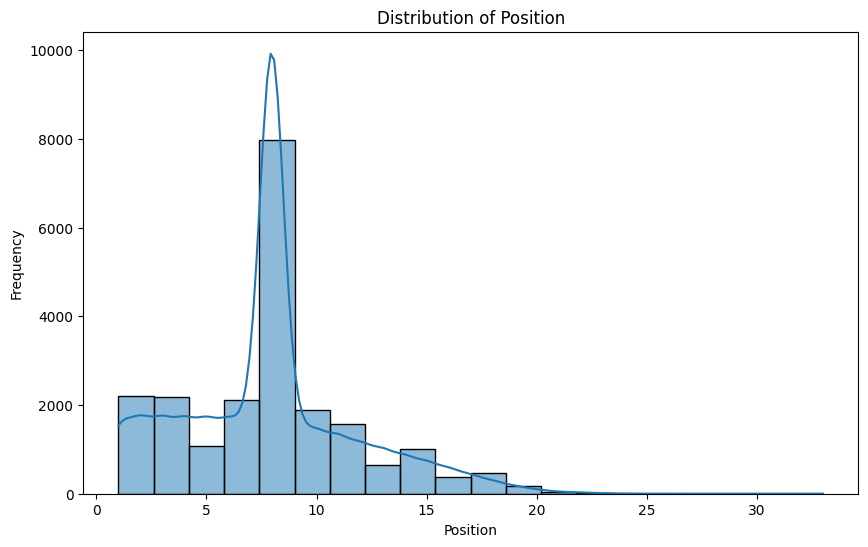

In [ ]:
# Distribution of the target variable `position`
plt.figure(figsize=(10, 6))
sns.histplot(resultsMerged['position'], kde=True, bins=20)
plt.title('Distribution of Position')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

**Insights:**

**Peak at Position 10**:


*   The highest frequency of race finishes is around position 10. This indicates that many drivers finish in this position.
Right-Skewed Distribution:

**Right-Skewed Distribution:**

*  The distribution is right-skewed, meaning there are more drivers finishing in positions closer to 1-10 than there are drivers finishing in positions greater than 10.

**Decreasing Frequency:**

*  As the position number increases (from 1 to 30), the frequency of drivers finishing in those positions decreases. This is expected as fewer drivers finish in the lower positions (closer to the front).
Significant Drop After Position 10:

**Significant Drop After Position 10:**

There is a noticeable drop in the number of drivers finishing after position

*  This suggests that while positions 1 to 10 are more competitive and have a higher number of finishes, positions beyond 10 see a significant decrease in frequency.

**Small Number of Outliers:**


*  There are few drivers finishing in positions beyond 20. This indicates that such positions are less common and could be due to various factors such as race retirements, disqualifications, or a large gap between leading drivers and the rest of the field.

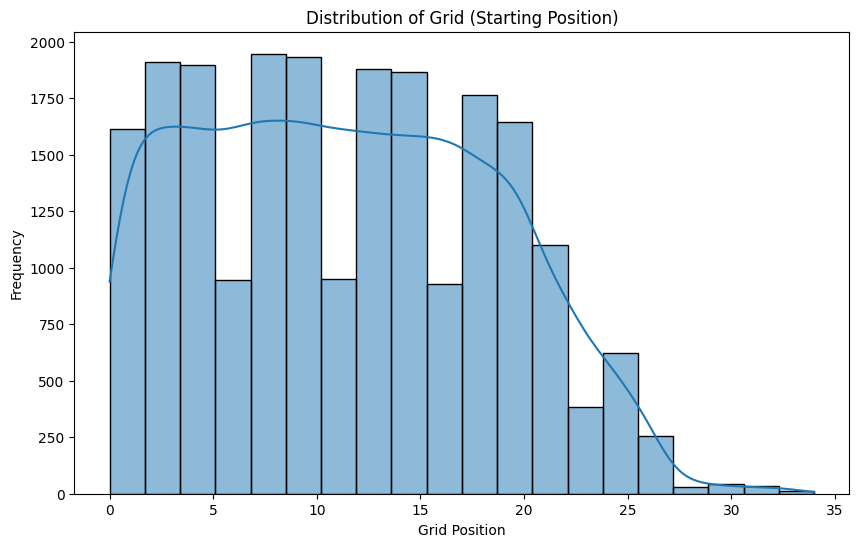

In [ ]:
# Distribution of the `grid` (starting position)
plt.figure(figsize=(10, 6))
sns.histplot(resultsMerged['resultStartingPosition'], kde=True, bins=20)
plt.title('Distribution of Grid (Starting Position)')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')
plt.show()

## Brief Highlights of the Grid Position Distribution:

1. **Uniform Distribution in Early Positions:**
   - Grid positions from 1 to 18 show relatively uniform frequencies, each with approximately 1500 to 2000 instances. This indicates a balanced competition among drivers for these spots.

2. **Significant Drop After Position 18:**
   - There is a noticeable decrease in frequency for grid positions beyond 18, becoming more pronounced towards the higher positions. This suggests fewer drivers start from these positions.

3. **Long Tail in Higher Positions:**
   - The distribution exhibits a long tail, with very few drivers starting from grid positions beyond 25. These positions are quite rare, indicating that starting at the back of the grid is uncommon.

4. **Competitive Nature of Early Positions:**
   - The higher and more consistent frequencies in positions 1 to 18 suggest these starting spots are highly competitive, likely due to the strategic advantage of starting closer to the front of the grid.



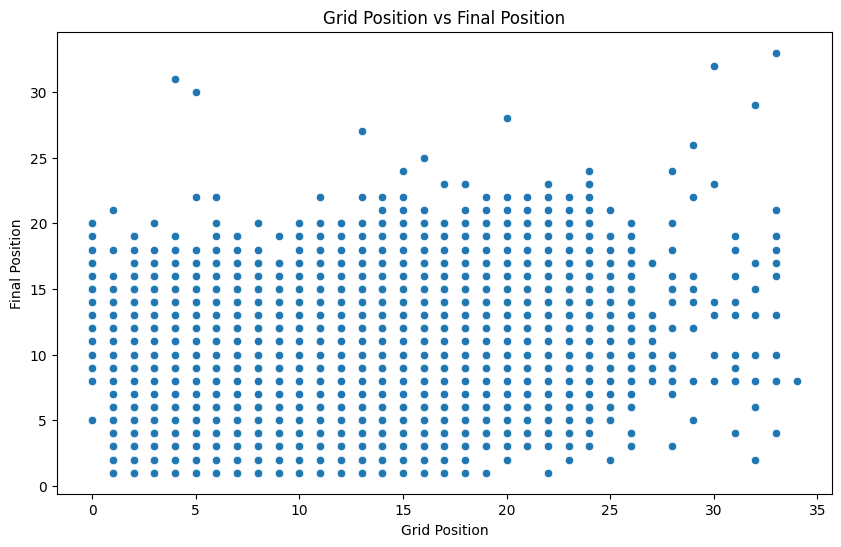

In [ ]:
# Relationship between `grid` and `position`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='resultStartingPosition', y='position', data=resultsMerged)
plt.title('Grid Position vs Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.show()

## Brief Highlights of the Grid Position vs Final Position:

1. **General Trend of Grid to Final Position:**
   - There is a noticeable trend where lower grid positions (closer to the front) generally correlate with better final positions. This suggests that starting closer to the front often results in finishing in a better position.

2. **Clustered Distribution for Top Positions:**
   - Grid positions from 1 to 20 show a dense clustering of final positions, indicating that most drivers starting within these positions tend to finish within the top 20 positions.

3. **Performance Variability:**
   - Despite the general trend, there is significant variability in final positions for drivers starting from mid-grid positions (10 to 20). This indicates that factors other than grid position, such as race incidents or strategy, influence final outcomes.

4. **Higher Grid Positions:**
   - Drivers starting from higher grid positions (beyond 20) show a wider spread in final positions, but typically do not finish in the top 5 positions. This suggests a disadvantage starting further back.

5. **Outliers:**
   - A few outliers exist where drivers starting from very high grid positions (25 to 35) managed to finish in significantly better positions, highlighting exceptional performances or advantageous race conditions.



In [ ]:
numerical_data = resultsMerged.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_matrix = numerical_data.corr()


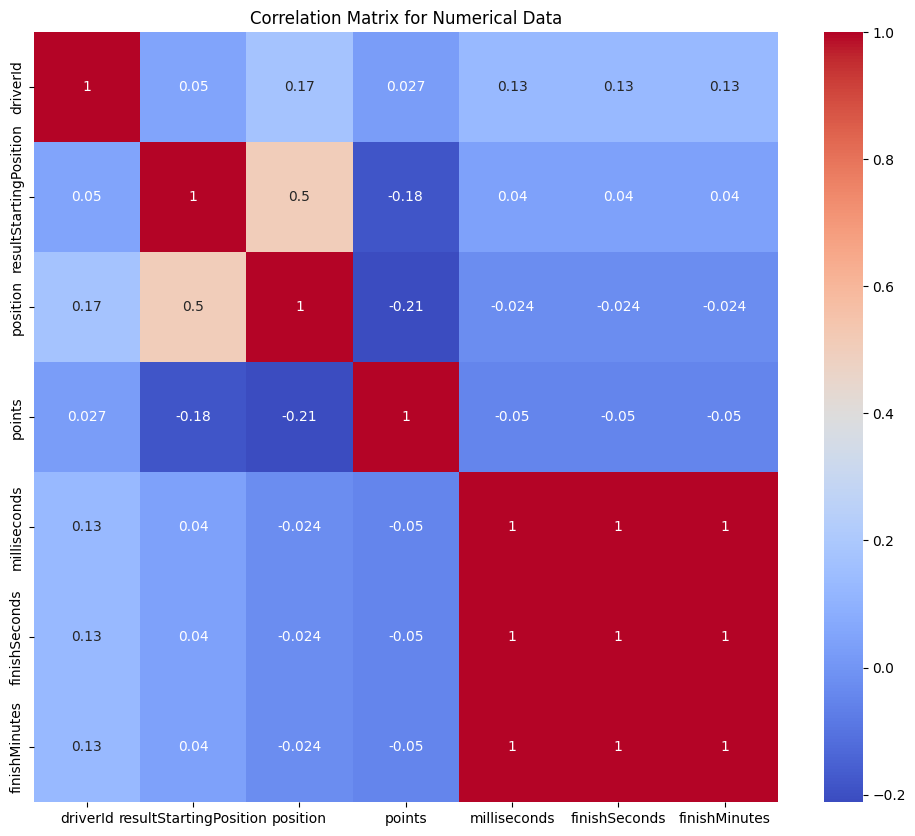

In [ ]:
# 2. Heatmap of Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Data')
plt.show()

In [ ]:
num_drivers = resultsMerged['driverId'].nunique()
print(f'There are {num_drivers} unique drivers in the dataset.')

There are 857 unique drivers in the dataset.


In [ ]:
driver_points = resultsMerged.groupby('driverId')['points'].sum()

In [ ]:
# Sort the drivers by points in descending order and get the top 10
top_10_drivers = driver_points.sort_values(ascending=False).head(10)

In [ ]:
# Merge top 10 drivers with the drivers DataFrame to get driver names
top_10_drivers_df = top_10_drivers.reset_index().merge(drivers, on='driverId')

<ipython-input-114-04950713d7a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='fullName', data=top_10_drivers_df, palette='viridis')


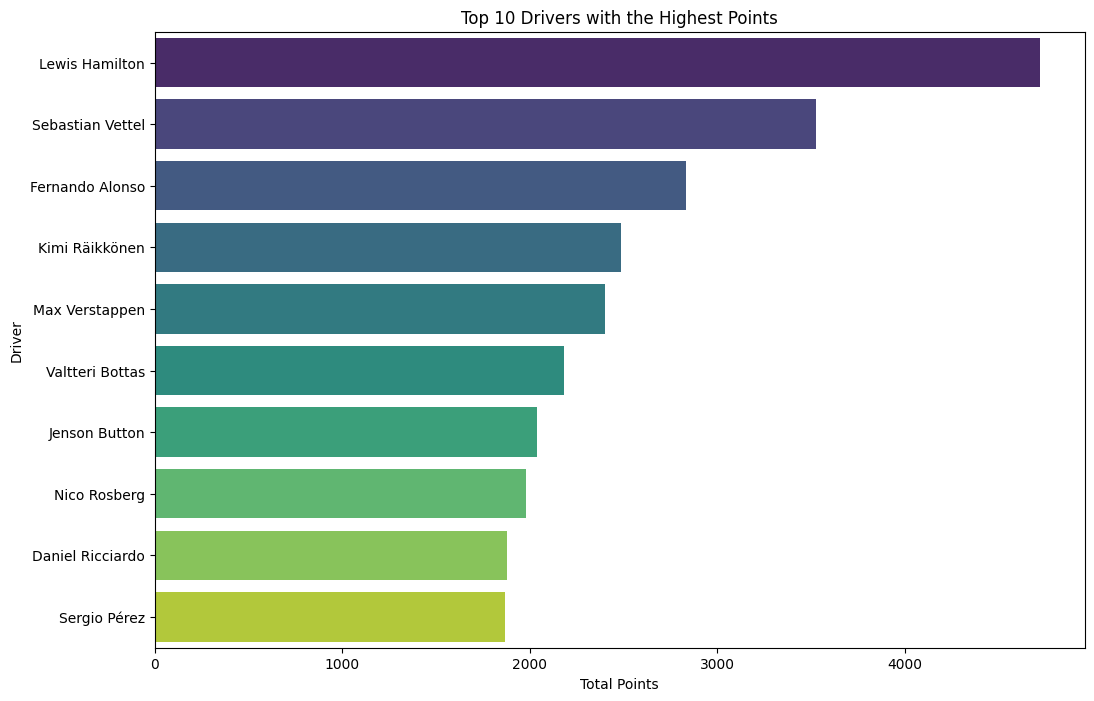

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='points', y='fullName', data=top_10_drivers_df, palette='viridis')
plt.title('Top 10 Drivers with the Highest Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

In [ ]:
# Set a threshold for the minimum number of races
min_races_threshold = 10

In [ ]:
# Calculate the number of races for each driver
driver_race_counts = resultsMerged['driverId'].value_counts()

In [ ]:
eligible_drivers = driver_race_counts[driver_race_counts > min_races_threshold].index


In [ ]:
# Filter the DataFrame to include only eligible drivers
filtered_results = resultsMerged[resultsMerged['driverId'].isin(eligible_drivers)]

In [ ]:

# Group by driverId and calculate the average position
driver_positions = filtered_results.groupby('driverId')['position'].mean()

In [ ]:
# Merge top 10 drivers with the drivers DataFrame to get driver names
top_10_drivers_position_df = top_10_drivers_by_position.reset_index().merge(drivers, on='driverId')


<ipython-input-144-941810e53ba7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='fullName', data=top_10_drivers_position_df, palette='viridis')


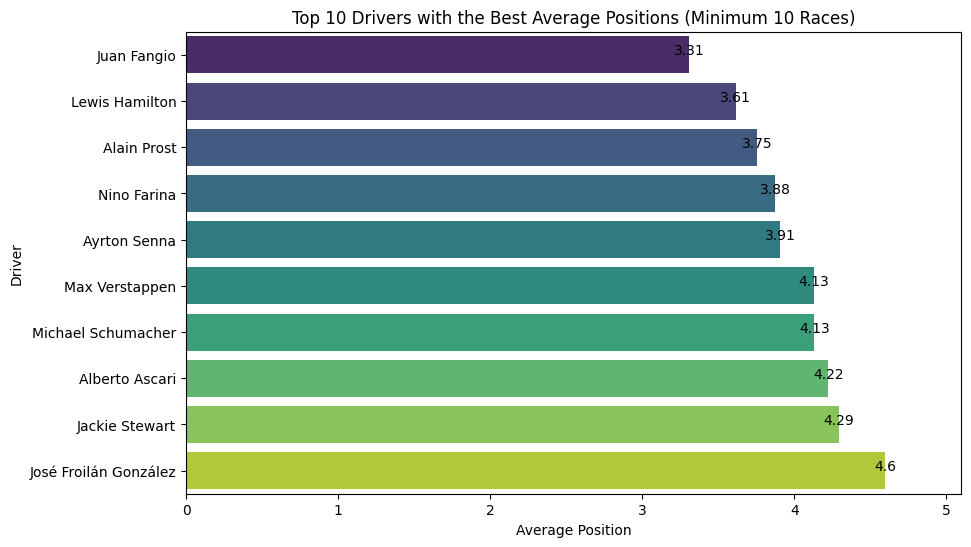

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='fullName', data=top_10_drivers_position_df, palette='viridis')
plt.title('Top 10 Drivers with the Best Average Positions (Minimum 10 Races)')
plt.xlabel('Average Position')
plt.ylabel('Driver')
# Adding data labels
for index, value in enumerate(top_10_drivers_position_df['position']):
    plt.text(value, index, round(value, 2), color='black', ha="center")

# Adjusting x-axis limit
plt.xlim(0, top_10_drivers_position_df['position'].max() + 0.5)

plt.show()

### ***Insights: ***

**Top Performer:**



Lewis Hamilton follows closely with an average position of 3.61. Hamiltion had the best average position out of all the racers.

Alain Prost has an average position of 3.75.
Juan Fangio has the best average position of 3.81.


Nino Farina maintains an average position of 3.88.
Ayrton Senna shows a strong performance with an average position of 3.91.

**Middle Tier Performers**

Max Verstappen and Michael Schumacher both have an average position of 4.13.
Alberto Ascari has an average position of 4.22.

**Lower Tier Performers in the Top 10:**

Jackie Stewart has an average position of 4.29.
José Froilán González rounds out the top 10 with an average position of 4.6.

In [ ]:
# Calculate the average finish time in minutes for each driver
driver_finish_times = resultsMerged.groupby('driverId')['finishMinutes'].mean()

In [ ]:
# Sort the drivers by average finish time in ascending order and get the top 10
top_10_drivers_by_finish_time = driver_finish_times.sort_values().head(10)

In [ ]:
# Merge top 10 drivers with the drivers DataFrame to get driver names
top_10_drivers_finish_time_df = top_10_drivers_by_finish_time.reset_index().merge(drivers, on='driverId')


<ipython-input-149-75db0cf5c735>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='finishMinutes', y='fullName', data=top_10_drivers_finish_time_df, palette='viridis')


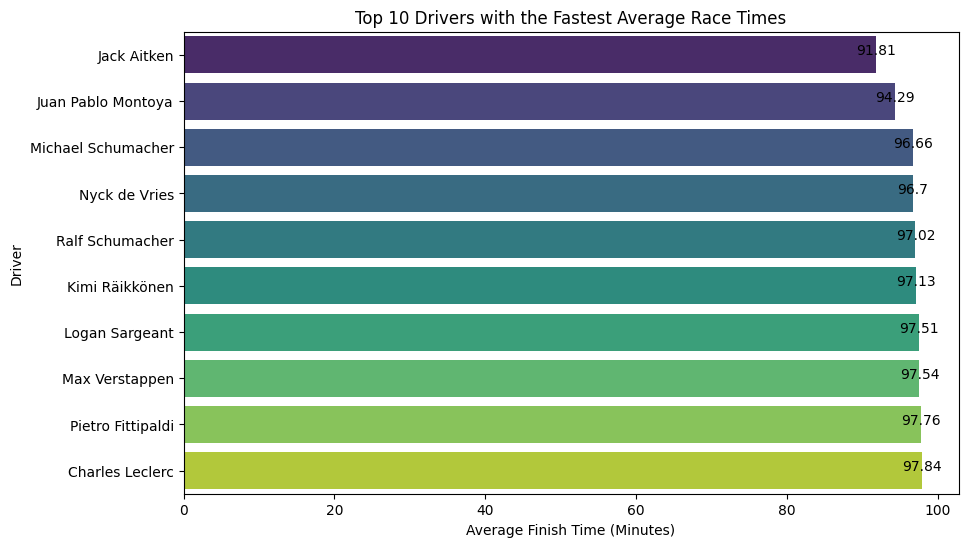

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='finishMinutes', y='fullName', data=top_10_drivers_finish_time_df, palette='viridis')
plt.title('Top 10 Drivers with the Fastest Average Race Times')
plt.xlabel('Average Finish Time (Minutes)')
plt.ylabel('Driver')

# Adding data labels
for index, value in enumerate(top_10_drivers_finish_time_df['finishMinutes']):
    plt.text(value, index, round(value, 2), color='black', ha="center")

plt.show()

In [ ]:
resultsMerged.head(20)

,driverId,resultStartingPosition,position,points,milliseconds,finishSeconds,finishMinutes,forename,surname,nationality,fullName,yearBirth,age,constructorName,constructorNationality
0,1,1,1.00,10.00,5690616.00,5690.62,94.84,Lewis,Hamilton,British,Lewis Hamilton,1985,39,McLaren,British
1,2,5,2.00,8.00,5696094.00,5696.09,94.93,Nick,Heidfeld,German,Nick Heidfeld,1977,47,BMW Sauber,German
2,3,7,3.00,6.00,5698779.00,5698.78,94.98,Nico,Rosberg,German,Nico Rosberg,1985,39,Williams,British
3,4,11,4.00,5.00,5707797.00,5707.80,95.13,Fernando,Alonso,Spanish,Fernando Alonso,1981,43,Renault,French
4,5,3,5.00,4.00,5708630.00,5708.63,95.14,Heikki,Kovalainen,Finnish,Heikki Kovalainen,1981,43,McLaren,British
5,6,13,6.00,3.00,6219500.02,6219.50,103.66,Kazuki,Nakajima,Japanese,Kazuki Nakajima,1985,39,Williams,British
6,7,17,7.00,2.00,6219500.02,6219.50,103.66,Sébastien,Bourdais,French,Sébastien Bourdais,1979,45,Toro Rosso,Italian
7,8,15,8.00,1.00,6219500.02,6219.50,103.66,Kimi,Räikkönen,Finnish,Kimi Räikkönen,1979,45,Ferrari,Italian
8,9,2,7.97,6.35,6219500.02,6219.50,103.66,Robert,Kubica,Polish,Robert Kubica,1984,40,BMW Sauber,German
9,10,18,7.97,6.35,6219500.02,6219.50,103.66,Timo,Glock,German,Timo Glock,1982,42,Toyota,Japanese


<ipython-input-152-d209ff1db7a1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')


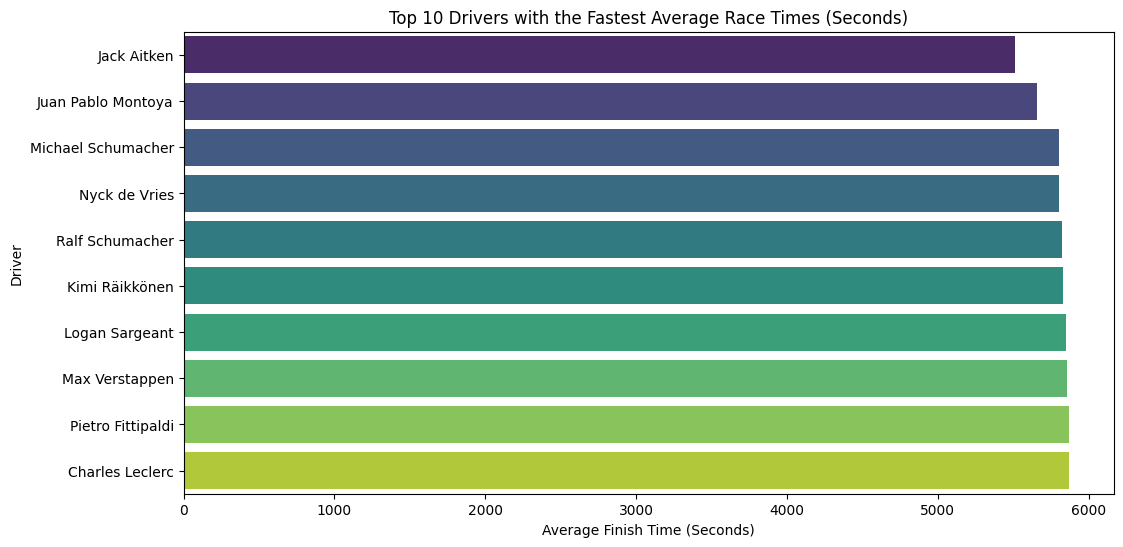

<ipython-input-152-d209ff1db7a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')


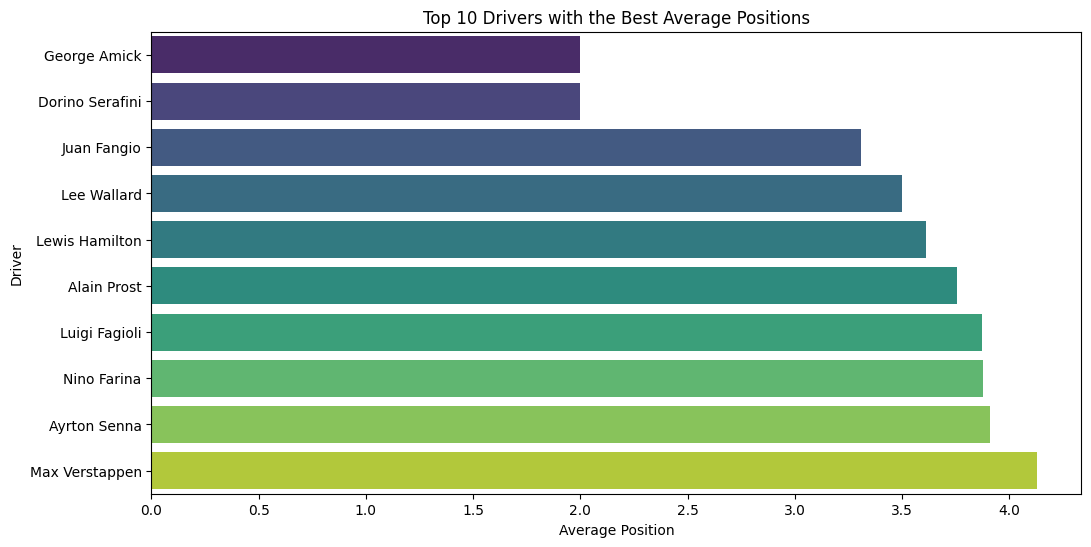

In [ ]:
# Calculate the average finish time in seconds for each driver
driver_finish_times = resultsMerged.groupby('driverId')['finishSeconds'].mean()
driver_average_positions = resultsMerged.groupby('driverId')['position'].mean()

# Combine both metrics into one DataFrame
driver_metrics = pd.DataFrame({
    'average_finish_time': driver_finish_times,
    'average_position': driver_average_positions
})

# Merge with the drivers DataFrame to get driver names
driver_metrics = driver_metrics.reset_index().merge(drivers, on='driverId')

# Plotting average finish times
plt.figure(figsize=(12, 6))

# Top 10 drivers by average finish time
top_10_by_finish_time = driver_metrics.sort_values(by='average_finish_time').head(10)
sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')
plt.title('Top 10 Drivers with the Fastest Average Race Times (Seconds)')
plt.xlabel('Average Finish Time (Seconds)')
plt.ylabel('Driver')
plt.show()

# Plotting average positions
plt.figure(figsize=(12, 6))

# Top 10 drivers by average position
top_10_by_position = driver_metrics.sort_values(by='average_position').head(10)
sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')
plt.title('Top 10 Drivers with the Best Average Positions')
plt.xlabel('Average Position')
plt.ylabel('Driver')
plt.show()

<ipython-input-155-abeede5f9e76>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')


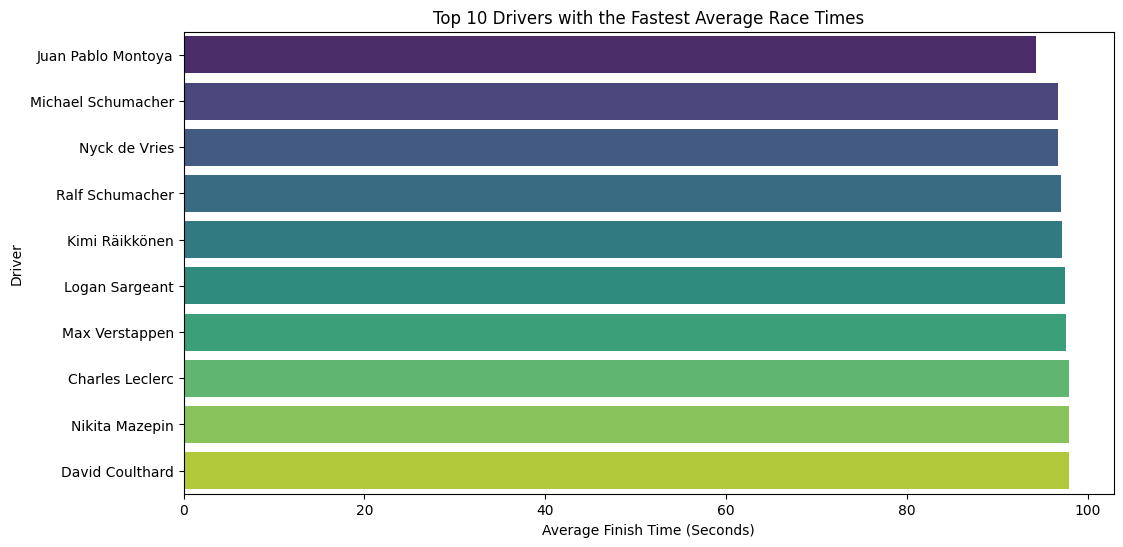

In [ ]:
# Set a threshold for the minimum number of races
min_races_threshold = 10

# Calculate the number of races for each driver
driver_race_counts = resultsMerged['driverId'].value_counts()

# Filter drivers who have participated in more than the threshold number of races
eligible_drivers = driver_race_counts[driver_race_counts > min_races_threshold].index

# Filter the DataFrame to include only eligible drivers
filtered_results = resultsMerged[resultsMerged['driverId'].isin(eligible_drivers)]

# Group by driverId and calculate the average position and finish time in seconds
driver_metrics = filtered_results.groupby('driverId').agg(
    average_position=('position', 'mean'),
    average_finish_time=('finishMinutes', 'mean')
).reset_index()

# Merge with the drivers DataFrame to get driver names
driver_metrics = driver_metrics.merge(drivers, on='driverId')

# Top 10 drivers by average finish time
top_10_by_finish_time = driver_metrics.sort_values(by='average_finish_time').head(10)

# Plotting average finish times
plt.figure(figsize=(12, 6))
sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')
plt.title('Top 10 Drivers with the Fastest Average Race Times')
plt.xlabel('Average Finish Time (Seconds)')
plt.ylabel('Driver')
plt.show()

<ipython-input-156-c95cd176ad7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')


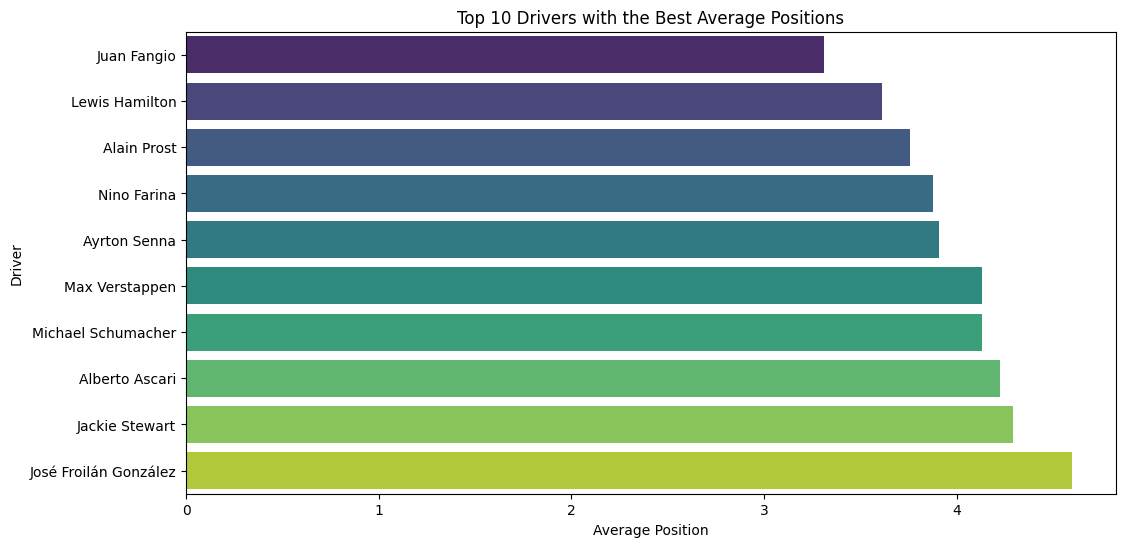

In [ ]:
# Top 10 drivers by average position
top_10_by_position = driver_metrics.sort_values(by='average_position').head(10)

# Plotting average positions
plt.figure(figsize=(12, 6))
sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')
plt.title('Top 10 Drivers with the Best Average Positions')
plt.xlabel('Average Position')
plt.ylabel('Driver')
plt.show()

In [ ]:
# Set a threshold for the minimum number of races
min_races_threshold = 10

# Calculate the number of races for each driver
driver_race_counts = resultsMerged['driverId'].value_counts()

# Filter drivers who have participated in more than the threshold number of races
eligible_drivers = driver_race_counts[driver_race_counts > min_races_threshold].index

# Filter the DataFrame to include only eligible drivers
filtered_results = resultsMerged[resultsMerged['driverId'].isin(eligible_drivers)]

In [ ]:
# Group by driverId and calculate the average position and finish time in seconds
driver_metrics = filtered_results.groupby('driverId').agg(
    average_position=('position', 'mean'),
    average_finish_time=('finishSeconds', 'mean'),
    total_points=('points', 'sum')
).reset_index()

In [ ]:
# Merge with the drivers DataFrame to get driver names
driver_metrics = driver_metrics.merge(drivers, on='driverId')

# Plotting average finish times
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-161-4585b9b56fdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')


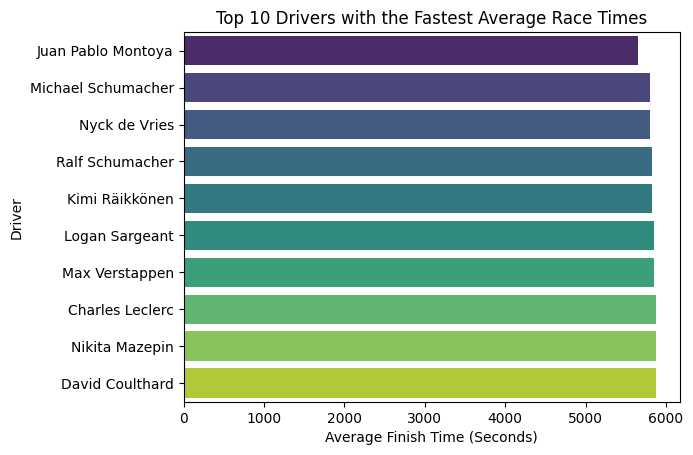

In [ ]:
# Top 10 drivers by average finish time
top_10_by_finish_time = driver_metrics.sort_values(by='average_finish_time').head(10)
sns.barplot(x='average_finish_time', y='fullName', data=top_10_by_finish_time, palette='viridis')
plt.title('Top 10 Drivers with the Fastest Average Race Times')
plt.xlabel('Average Finish Time (Seconds)')
plt.ylabel('Driver')
plt.show()

<ipython-input-163-c8fcec6abfc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')


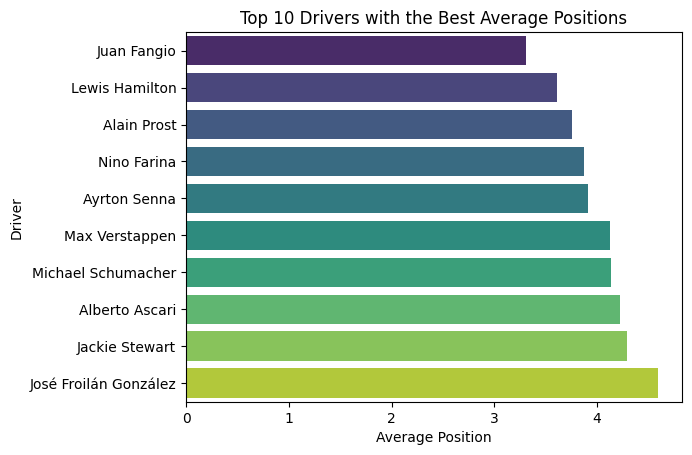

In [ ]:
# Top 10 drivers by average position
top_10_by_position = driver_metrics.sort_values(by='average_position').head(10)
sns.barplot(x='average_position', y='fullName', data=top_10_by_position, palette='viridis')
plt.title('Top 10 Drivers with the Best Average Positions')
plt.xlabel('Average Position')
plt.ylabel('Driver')
plt.show()

In [ ]:
# Calculate the number of races for each driver
driver_race_counts = resultsMerged['driverId'].value_counts()

# Filter drivers who have participated in more than the threshold number of races
eligible_drivers = driver_race_counts[driver_race_counts > min_races_threshold].index

# Filter the DataFrame to include only eligible drivers
filtered_results = resultsMerged[resultsMerged['driverId'].isin(eligible_drivers)]

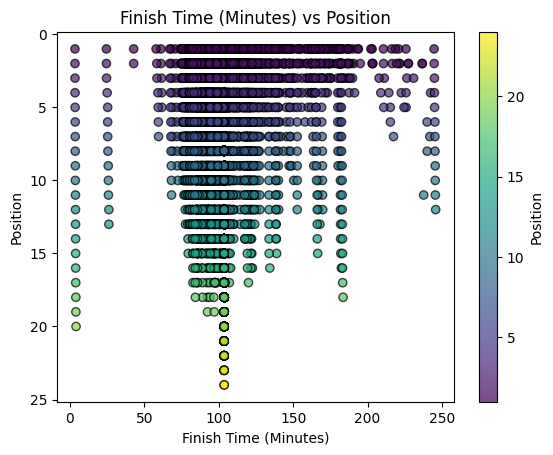

In [ ]:
# Create a scatter plot with different colors
scatter = plt.scatter(filtered_results['finishMinutes'], filtered_results['position'],
                      c=filtered_results['position'], cmap='viridis', edgecolor='k', alpha=0.7)

plt.title('Finish Time (Minutes) vs Position')
plt.xlabel('Finish Time (Minutes)')
plt.ylabel('Position')
plt.gca().invert_yaxis()  # Invert y-axis to show 1st position at the top
plt.colorbar(scatter, label='Position')

In [ ]:
# Calculate the average age
average_age = resultsMerged['age'].mean()

print(f'The average age is {average_age:.2f} years.')

The average age is 63.22 years.


In [ ]:
resultsMerged.head(20)

,driverId,resultStartingPosition,position,points,milliseconds,finishSeconds,finishMinutes,forename,surname,nationality,fullName,yearBirth,age,constructorName,constructorNationality
0,1,1,1.00,10.00,5690616.00,5690.62,94.84,Lewis,Hamilton,British,Lewis Hamilton,1985,39,McLaren,British
1,2,5,2.00,8.00,5696094.00,5696.09,94.93,Nick,Heidfeld,German,Nick Heidfeld,1977,47,BMW Sauber,German
2,3,7,3.00,6.00,5698779.00,5698.78,94.98,Nico,Rosberg,German,Nico Rosberg,1985,39,Williams,British
3,4,11,4.00,5.00,5707797.00,5707.80,95.13,Fernando,Alonso,Spanish,Fernando Alonso,1981,43,Renault,French
4,5,3,5.00,4.00,5708630.00,5708.63,95.14,Heikki,Kovalainen,Finnish,Heikki Kovalainen,1981,43,McLaren,British
5,6,13,6.00,3.00,6219500.02,6219.50,103.66,Kazuki,Nakajima,Japanese,Kazuki Nakajima,1985,39,Williams,British
6,7,17,7.00,2.00,6219500.02,6219.50,103.66,Sébastien,Bourdais,French,Sébastien Bourdais,1979,45,Toro Rosso,Italian
7,8,15,8.00,1.00,6219500.02,6219.50,103.66,Kimi,Räikkönen,Finnish,Kimi Räikkönen,1979,45,Ferrari,Italian
8,9,2,7.97,6.35,6219500.02,6219.50,103.66,Robert,Kubica,Polish,Robert Kubica,1984,40,BMW Sauber,German
9,10,18,7.97,6.35,6219500.02,6219.50,103.66,Timo,Glock,German,Timo Glock,1982,42,Toyota,Japanese


In [ ]:
# get disticnt constructorNationality count
resultsMerged['constructorNationality'].nunique()


24

<ipython-input-188-382638fb56cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='constructorNationality', data=top_5_constructors, palette='viridis')


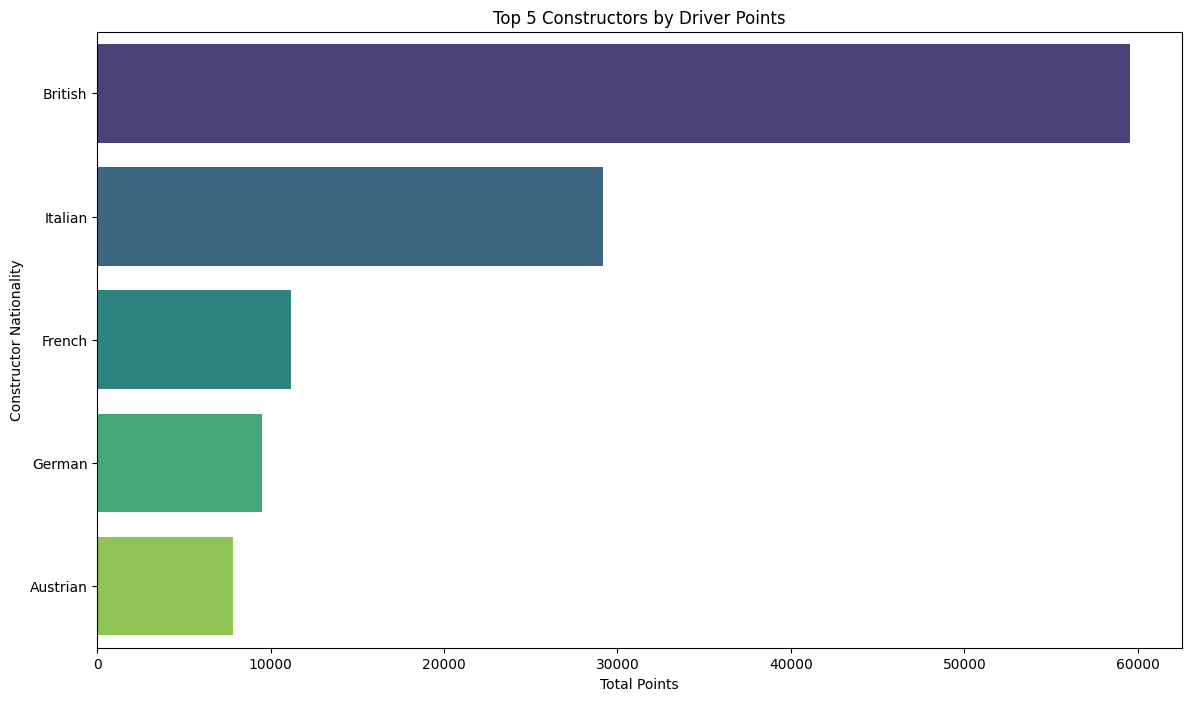

In [ ]:

# Group by constructor nationality and sum the total points for each constructor nationality
constructor_points = resultsMerged.groupby('constructorNationality')['points'].sum().reset_index()

# Sort the constructor nationalities by total points and get the top 5
top_5_constructors = constructor_points.sort_values(by='points', ascending=False).head(5)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='points', y='constructorNationality', data=top_5_constructors, palette='viridis')
plt.title('Top 5 Constructors by Driver Points')
plt.xlabel('Total Points')
plt.ylabel('Constructor Nationality')
plt.show()

In [ ]:
# keeping only these columns resultStartingPosition,	position,	points, finishSeconds
resultsMerged = resultsMerged[['resultStartingPosition', 'position', 'points', 'finishSeconds']]

In [ ]:
resultsMerged.head(20)

,resultStartingPosition,position,points,finishSeconds
0,1,1.00,10.00,5690.62
1,5,2.00,8.00,5696.09
2,7,3.00,6.00,5698.78
3,11,4.00,5.00,5707.80
4,3,5.00,4.00,5708.63
5,13,6.00,3.00,6219.50
6,17,7.00,2.00,6219.50
7,15,8.00,1.00,6219.50
8,2,7.97,6.35,6219.50
9,18,7.97,6.35,6219.50


In [ ]:


# Assuming 'resultsMerged' is your DataFrame
resultsMerged = resultsMerged[['resultStartingPosition', 'position', 'points', 'finishSeconds']]

# Calculate the correlation matrix
correlation_matrix = resultsMerged.corr()

# Display the correlation matrix
print(correlation_matrix)


                        resultStartingPosition  position  points  \
resultStartingPosition                    1.00      0.50   -0.18   
position                                  0.50      1.00   -0.21   
points                                   -0.18     -0.21    1.00   
finishSeconds                             0.04     -0.02   -0.05   

                        finishSeconds  
resultStartingPosition           0.04  
position                        -0.02  
points                          -0.05  
finishSeconds                    1.00  


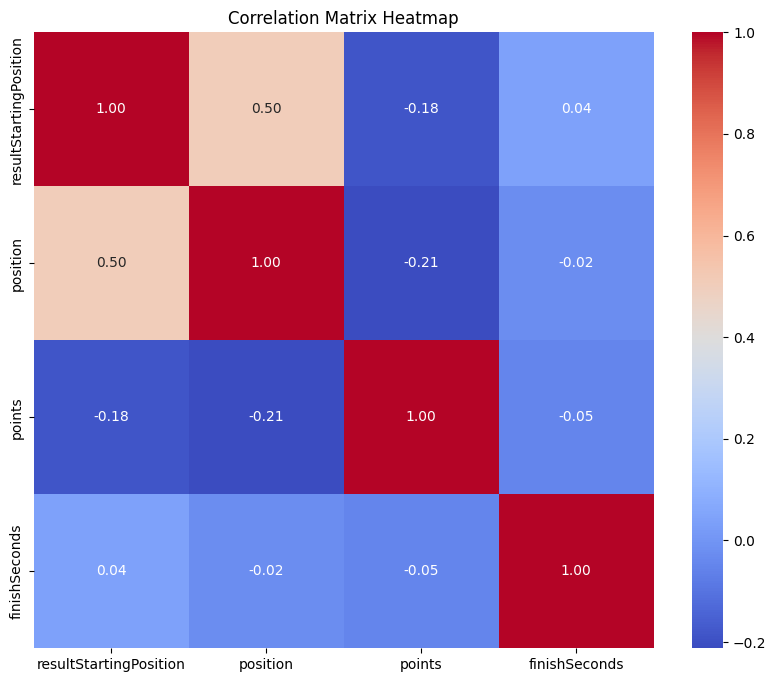

In [ ]:
# Calculate the correlation matrix
correlation_matrix = resultsMerged.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Select the features and target
features = ['resultStartingPosition', 'points', 'finishSeconds']
target = 'position'

X = resultsMerged[features]
y = resultsMerged[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 11.401087169114483
R-squared: 0.2489129575923833


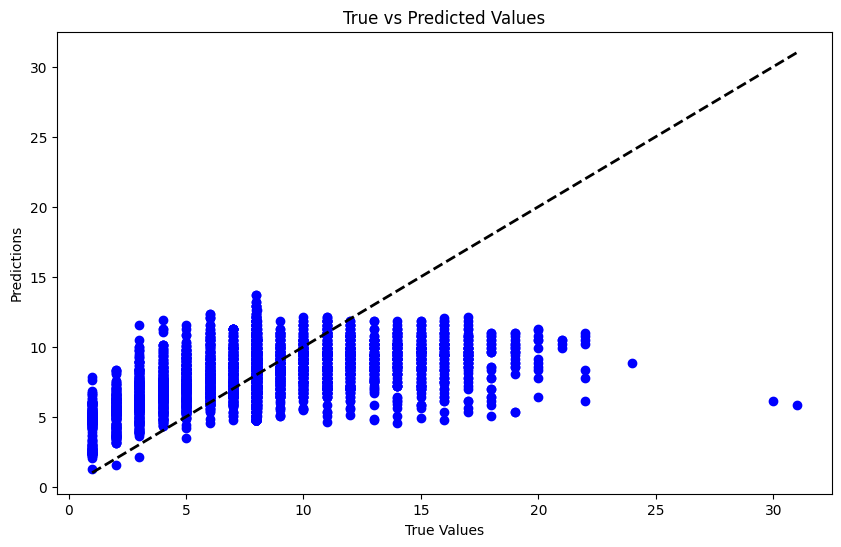

In [ ]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


Cross-validated R-squared scores: [0.27131346 0.07403752 0.04429759 0.04257074 0.1193916 ]
Mean R-squared score: 0.11032218174382373
Mean Squared Error: 11.401087169114483
R-squared: 0.2489129575923833


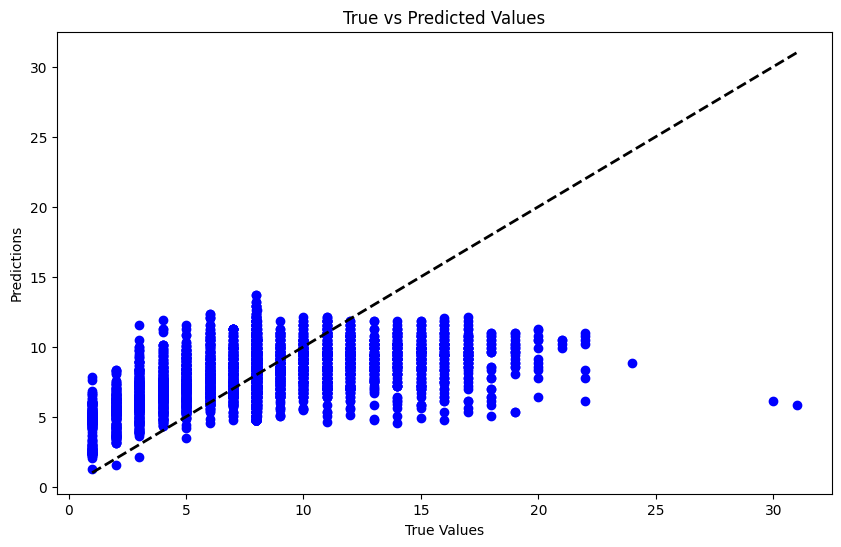

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Standardize the data and apply Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {scores}')
print(f'Mean R-squared score: {scores.mean()}')

# Train and evaluate the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


Best hyperparameters: {'regressor__alpha': 10}
Mean Squared Error: 11.400941408691693
R-squared: 0.24892256007706126


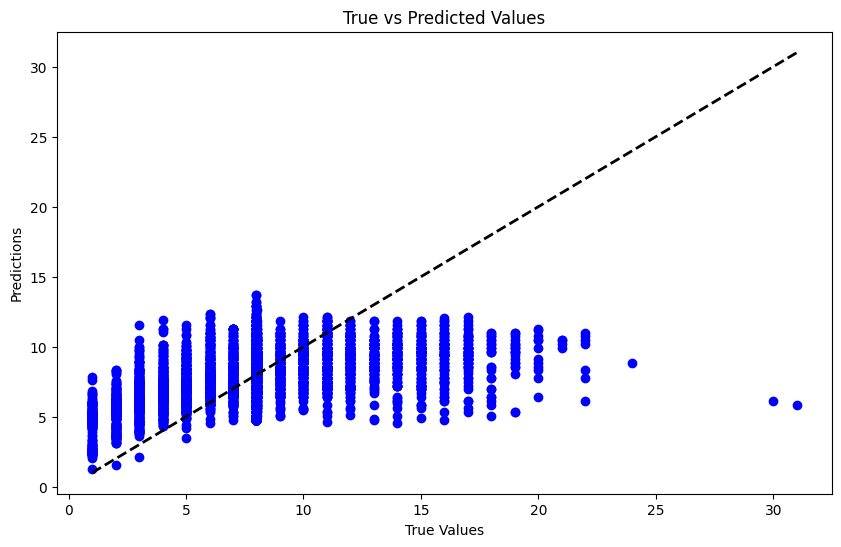

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create a pipeline with standard scaling and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Define the hyperparameter grid for Ridge Regression
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print cross-validation scores
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {cv_scores.mean()}")

Cross-validation R-squared scores: [0.27131346 0.07403752 0.04429759 0.04257074 0.1193916 ]
Mean R-squared score: 0.11032218174382372


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Define the model
ridge_model = Ridge()

# Perform cross-validation for R-squared
r2_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')

# Perform cross-validation for Mean Squared Error
mse_scores = -cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores
print(f"Cross-validation R-squared scores: {r2_scores}")
print(f"Mean R-squared score: {r2_scores.mean()}")

print(f"Cross-validation Mean Squared Error scores: {mse_scores}")
print(f"Mean Mean Squared Error score: {mse_scores.mean()}")


Cross-validation R-squared scores: [0.27131347 0.07403807 0.04429816 0.04257049 0.11939229]
Mean R-squared score: 0.11032249611406679
Cross-validation Mean Squared Error scores: [10.51192038 10.32440942 10.19640552 15.08404403 21.11187637]
Mean Mean Squared Error score: 13.445731143172704


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline with standard scaling and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Perform cross-validation for R-squared
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Perform cross-validation for Mean Squared Error
mse_scores = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores
print(f"Cross-validation R-squared scores: {r2_scores}")
print(f"Mean R-squared score: {r2_scores.mean()}")

print(f"Cross-validation Mean Squared Error scores: {mse_scores}")
print(f"Mean Mean Squared Error score: {mse_scores.mean()}")


Cross-validation R-squared scores: [0.27130639 0.0740565  0.04431627 0.04257255 0.11938567]
Mean R-squared score: 0.1103274766297651
Cross-validation Mean Squared Error scores: [10.51202256 10.32420387 10.19621227 15.08401157 21.11203515]
Mean Mean Squared Error score: 13.445697082573286


In [ ]:
pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load your data
# df = pd.read_csv('your_dataset.csv') # Load your dataset here

# Assuming 'target' is your target variable
target = 'position'

# Separate the features and target
X = resultsMerged.drop(columns=[target])
y = resultsMerged[target]

# Model with all features
model_with_finishSeconds = GradientBoostingRegressor()
scores_with_finishSeconds = cross_val_score(model_with_finishSeconds, X, y, cv=5, scoring='r2')
mse_with_finishSeconds = cross_val_score(model_with_finishSeconds, X, y, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting with all features")
print("Cross-validation R-squared scores:", scores_with_finishSeconds)
print("Mean R-squared score:", scores_with_finishSeconds.mean())
print("Cross-validation MSE scores:", -mse_with_finishSeconds)
print("Mean MSE score:", -mse_with_finishSeconds.mean())

# Drop the 'finishSeconds' feature
X_dropped = X.drop(columns=['finishSeconds'])

# Model without finishSeconds
model_without_finishSeconds = GradientBoostingRegressor()
scores_without_finishSeconds = cross_val_score(model_without_finishSeconds, X_dropped, y, cv=5, scoring='r2')
mse_without_finishSeconds = cross_val_score(model_without_finishSeconds, X_dropped, y, cv=5, scoring='neg_mean_squared_error')

print("\nGradient Boosting without 'finishSeconds'")
print("Cross-validation R-squared scores:", scores_without_finishSeconds)
print("Mean R-squared score:", scores_without_finishSeconds.mean())
print("Cross-validation MSE scores:", -mse_without_finishSeconds)
print("Mean MSE score:", -mse_without_finishSeconds.mean())


Gradient Boosting with all features
Cross-validation R-squared scores: [0.62609612 0.54636418 0.53690931 0.38718421 0.36543621]
Mean R-squared score: 0.4923980068789053
Cross-validation MSE scores: [ 5.39388021  5.05654396  4.94072546  9.61509713 15.21313625]
Mean MSE score: 8.04387660210412

Gradient Boosting without 'finishSeconds'
Cross-validation R-squared scores: [0.64858797 0.54119411 0.53847477 0.47115139 0.35098441]
Mean R-squared score: 0.5100785288847585
Cross-validation MSE scores: [ 5.06941625  5.11565293  4.9240236   8.3318674  15.55963764]
Mean MSE score: 7.800119563614425


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your data
# df = pd.read_csv('your_dataset.csv')  # Load your dataset here

# Assuming 'target' is your target variable
target = 'position'

# Separate the features and target
X = resultsMerged.drop(columns=[target])
y = resultsMerged[target]

# Model with all features
model_with_finishSeconds = RandomForestRegressor()
scores_with_finishSeconds = cross_val_score(model_with_finishSeconds, X, y, cv=5, scoring='r2')
mse_with_finishSeconds = cross_val_score(model_with_finishSeconds, X, y, cv=5, scoring='neg_mean_squared_error')

print("Random Forest with all features")
print("Cross-validation R-squared scores:", scores_with_finishSeconds)
print("Mean R-squared score:", scores_with_finishSeconds.mean())
print("Cross-validation MSE scores:", -mse_with_finishSeconds)
print("Mean MSE score:", -mse_with_finishSeconds.mean())

# Drop the 'finishSeconds' feature
X_dropped = X.drop(columns=['finishSeconds'])

# Model without finishSeconds
model_without_finishSeconds = RandomForestRegressor()
scores_without_finishSeconds = cross_val_score(model_without_finishSeconds, X_dropped, y, cv=5, scoring='r2')
mse_without_finishSeconds = cross_val_score(model_without_finishSeconds, X_dropped, y, cv=5, scoring='neg_mean_squared_error')

print("\nRandom Forest without 'finishSeconds'")
print("Cross-validation R-squared scores:", scores_without_finishSeconds)
print("Mean R-squared score:", scores_without_finishSeconds.mean())
print("Cross-validation MSE scores:", -mse_without_finishSeconds)
print("Mean MSE score:", -mse_without_finishSeconds.mean())


Random Forest with all features
Cross-validation R-squared scores: [0.58125194 0.53360855 0.51440735 0.3969911  0.37389978]
Mean R-squared score: 0.48003174271039306
Cross-validation MSE scores: [ 6.04837254  5.18695666  5.19519049  9.57381261 15.02708204]
Mean MSE score: 8.206282869836581

Random Forest without 'finishSeconds'
Cross-validation R-squared scores: [0.64219945 0.53937041 0.53392675 0.46753878 0.35953675]
Mean R-squared score: 0.5085144259146022
Cross-validation MSE scores: [ 5.16063502  5.14359905  4.96611124  8.39219933 15.39216472]
Mean MSE score: 7.810941871433715


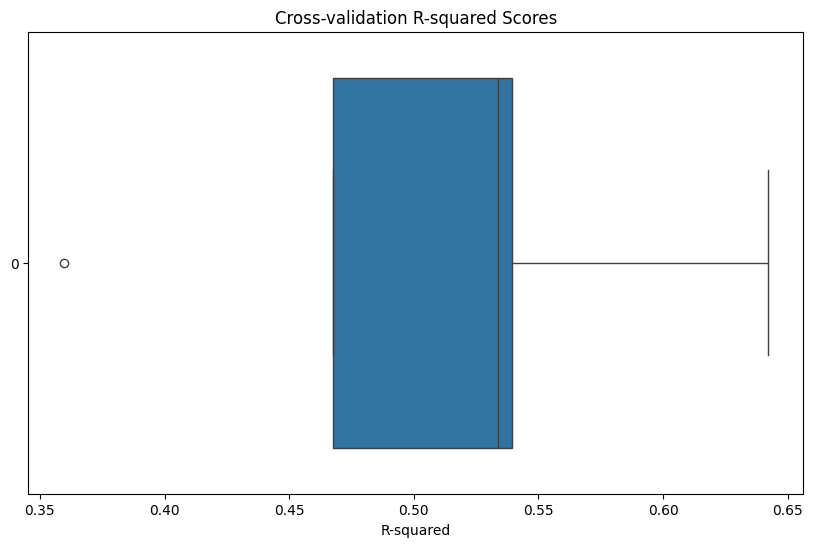

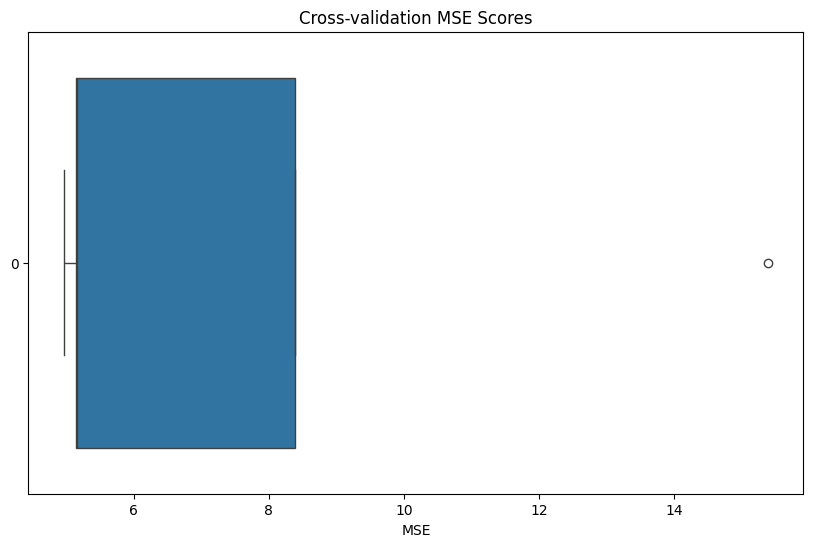

In [ ]:
# Cross-validation R-squared scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[scores_without_finishSeconds], orient='h')
plt.title('Cross-validation R-squared Scores')
plt.xlabel('R-squared')
plt.show()

# Cross-validation MSE scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[-mse_without_finishSeconds], orient='h')
plt.title('Cross-validation MSE Scores')
plt.xlabel('MSE')
plt.show()

 shows the distribution of the cross-validation R-squared scores for the Random Forest model without the finishSeconds feature. The scores range from approximately 0.35 to 0.65, with a median around 0.51. The presence of an outlier at the lower end (around 0.35) indicates variability in model performance across different cross-validation folds.

shows the distribution of the cross-validation Mean Squared Error (MSE) scores for the Random Forest model without the finishSeconds feature. The MSE scores mostly range between approximately 6 and 8, with one outlier around 15, indicating some variability in the model's prediction errors across different cross-validation folds. The lower MSE values suggest better model performance, while the outlier indicates that the model performed worse in at least one fold.

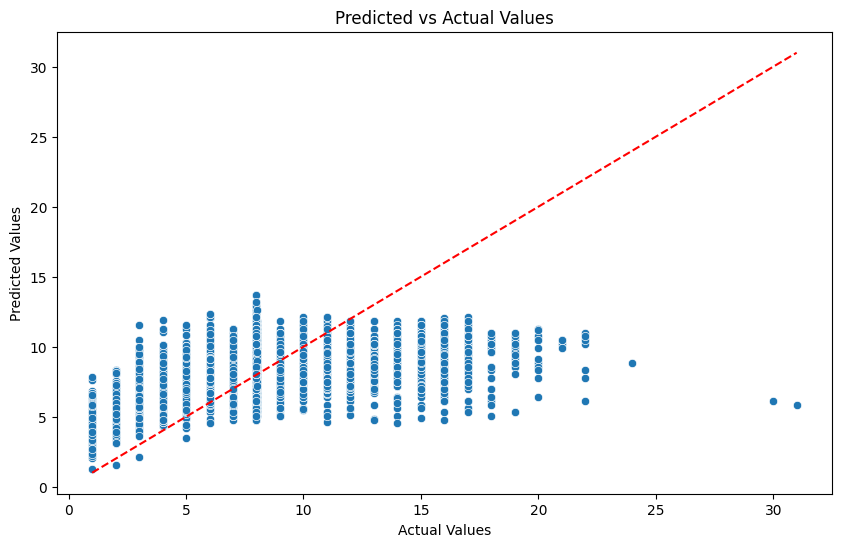

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Highlights:**
The points are generally aligned along the red dashed line, indicating that the model's predictions are reasonably close to the actual values.
There is some scatter around the line, particularly as the actual values increase, suggesting some prediction error.
The spread of points suggests that the model performs better for lower actual values and has higher variance in predictions for higher actual values.

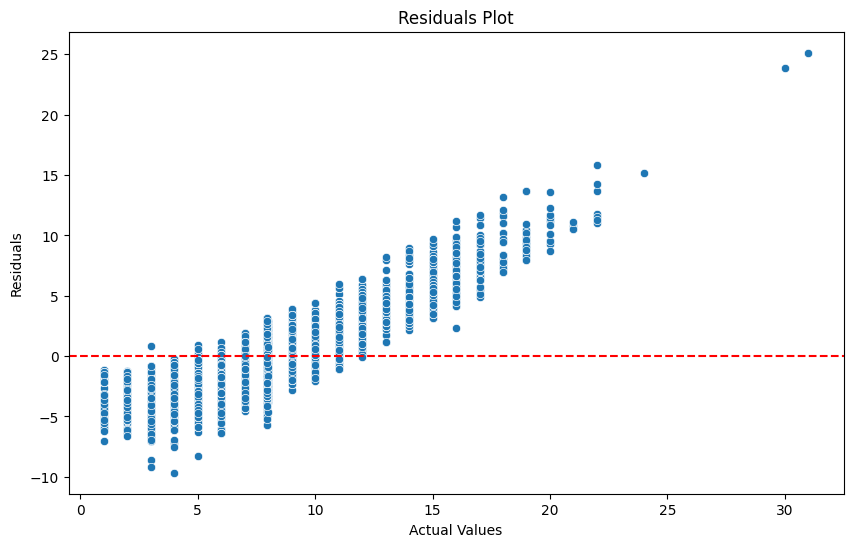

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


shows the residuals (the differences between actual and predicted values) against the actual values for the Random Forest model without the finishSeconds feature.

The residuals are generally centered around zero for lower actual values, indicating good model performance.
As the actual values increase, the residuals become more positive, suggesting the model tends to underpredict higher actual values.
There is a clear pattern of increasing residuals with increasing actual values, indicating potential heteroscedasticity (variance of errors increases with the actual values). This suggests the model may not be capturing all the underlying patterns in the data.

In [ ]:
resultsMerged.head()

,resultStartingPosition,position,points,finishSeconds
0,1,1.00,10.00,5690.62
1,5,2.00,8.00,5696.09
2,7,3.00,6.00,5698.78
3,11,4.00,5.00,5707.80
4,3,5.00,4.00,5708.63


Random Forest model without the finishSeconds feature. Each point represents an observation.

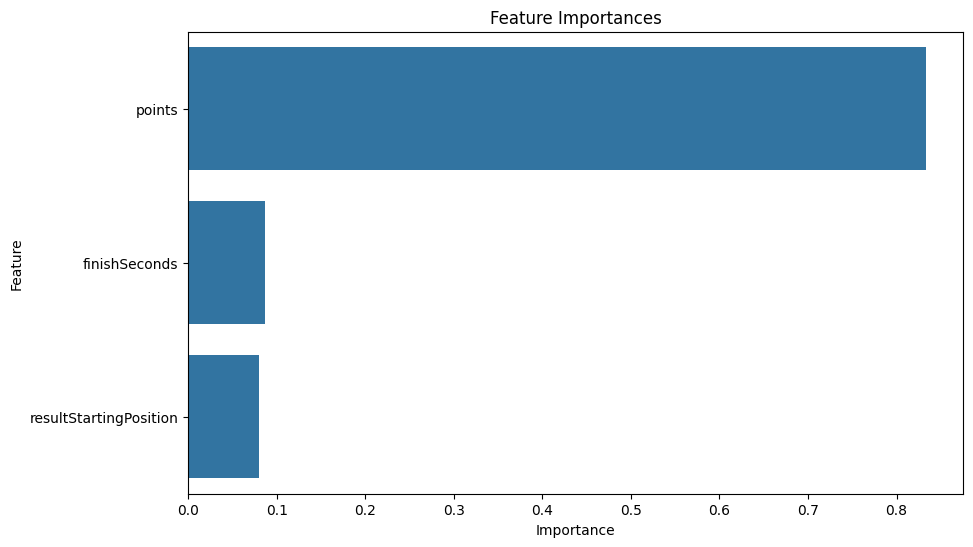

In [ ]:
# Assuming 'resultsMerged' is your DataFrame and 'position' is your target variable
target = 'position'

# Drop the target variable to create the feature set
X = resultsMerged.drop(columns=[target])
y = resultsMerged[target]

# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Points: This feature has the highest importance, contributing significantly more to the model's predictions than the other features. It indicates that the points a driver has scored are the most influential factor in predicting their position.

finishSeconds: This feature has moderate importance, indicating that the time it takes for a driver to finish a race also plays a role in predicting their position, but it is less influential than points.

resultStartingPosition: This feature has the lowest importance among the three, suggesting that while the starting position affects the final position, it is not as strong a predictor as points or finishSeconds.

